# 1. Shear Force Diagram, Bending Moment Diagram NUMPY

![image](https://www.researchgate.net/profile/Aditya-Chingale/publication/270280210/figure/fig1/AS:392235926474769@1470527740813/SFD-and-BMD-of-a-simply-supported-beam-under-UDL-3-DESIGN-OF-RCC-LINTEL-In-the-method-of.png)

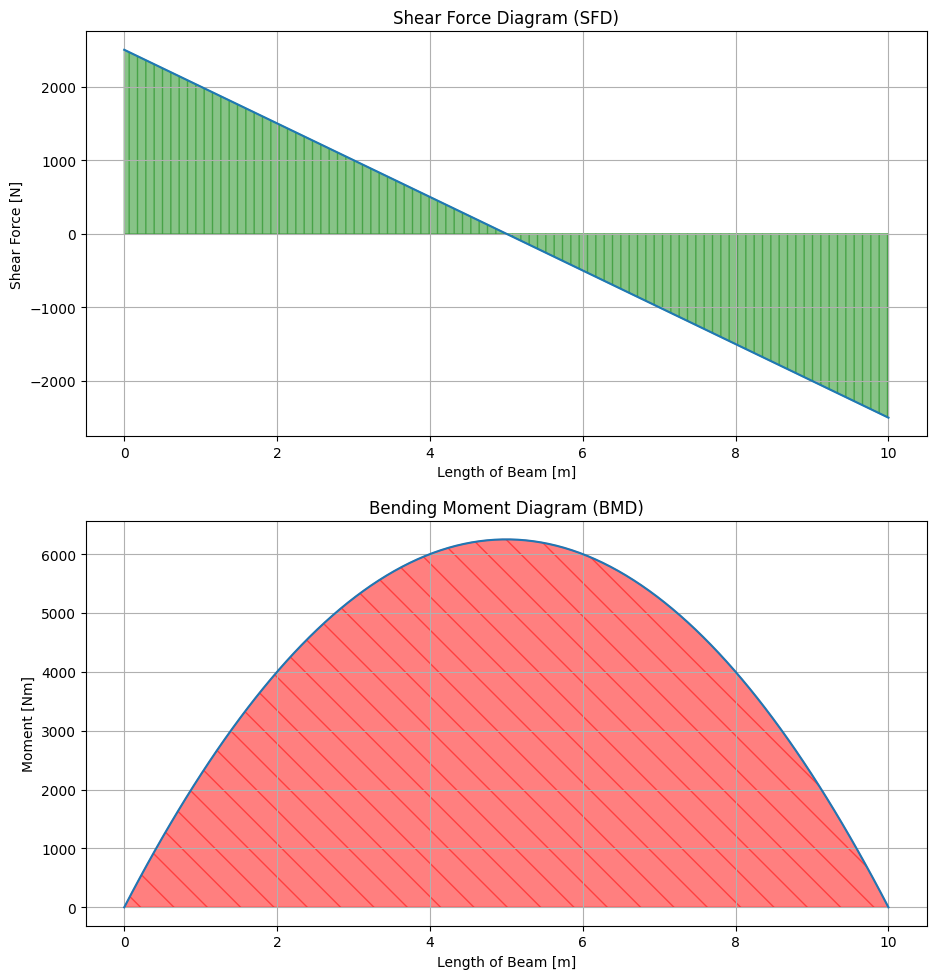

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#inputs
w = 500 # uniform distributed load(udL) [N]
L = 10 # Length of the beam [m]
R = w*L/2 # reaction
x = np.linspace(0,L,100)

# create list and loop for each length of the beam
X = []
SF = []
M = []
for l in x:
    sf = R -(w*l)   # calculate shear force　(せん断力)
    m = (R*l) - (w*l**2/2) # calculate moment (モーメント)
    X.append(l)
    SF.append(sf)
    M.append(m)

# set graph size
plt.figure(figsize=(10,10))

# plot for shear force diagram
plt.subplot(2,1,1)
plt.plot(X,SF)
plt.fill_between(X,SF,color='green',hatch='||',alpha=0.47)
plt.title("Shear Force Diagram (SFD)")
plt.xlabel('Length of Beam [m]')
plt.ylabel('Shear Force [N]')
plt.grid()

# plot for bending moment diagram
plt.tight_layout(pad = 3.0)
plt.subplot(2,1,2)
plt.plot(X,M)
plt.fill_between(X,M,color='red',hatch='\\',alpha=0.5)
plt.title('Bending Moment Diagram (BMD)')
plt.xlabel('Length of Beam [m]')
plt.ylabel('Moment [Nm]')
plt.grid()
plt.show()

example

![img](https://i.imgur.com/LQPAN5t.jpg)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#inputs
w = 5000 # uniform distributed load [N]
L = 10 # Length of the beam [m]

# lengths [m]
a = 2.5
b = 5
c = L - (a+b)

# reactions (反力) [Nm]
R1 = (w*b/L)*(c+b/2)
R2 = (w*b/L)*(a+b/2)

l = np.linspace(0,L,100)

# create list and loop for each length of the beam
X = []
SF = []
M = []
for x in l:
     # calculate shear force　(せん断力) and moment (モーメント) for each x until L
    if x < a:
        sf = R1
        m = R1*x

    elif a < x < (a+b):
        sf = R1 - (w*(x-a))
        m = (R1*x) - (w*(x-a)**2/2)

    elif x > (a+b):
        sf =-R2
        m = R2*(L-x)
    X.append(x)
    SF.append(sf)
    M.append(m)

# set graph size
plt.figure(figsize=(10,10))

# plot for shear force diagram
plt.subplot(2,1,1)
plt.plot(X,SF)
plt.fill_between(X,SF,color='green',hatch='||',alpha=0.47)
plt.title("Shear Force Diagram (SFD)")
plt.xlabel('Length of Beam [m]')
plt.ylabel('Shear Force [N]')
plt.grid()

# plot for bending moment diagram
plt.tight_layout(pad = 3.0)
plt.subplot(2,1,2)
plt.plot(X,M)
plt.fill_between(X,M,color='yellow',hatch='\\',alpha=0.5)
plt.title('Bending Moment Diagram (BMD)')
plt.xlabel('Length of Beam [m]')
plt.ylabel('Moment [Nm]')
plt.grid()

plt.show()

Reference:
1. [Shear Force and Bending Moment Diagrams Notes for Mechanical Engineering](https://gradeup.co/shear-force-and-bending-moment-diagrams-i-65150dd3-c4f8-11e5-8c0c-840e287b4af0)
2. [Simply Supported UDL Beam Formulas and Equations](https://www.aboutcivil.org/simply-supported-UDL-beam-formulas-bending-moment-equations.html)

# 2. Euler Bernoulli Beam "solver" SYMPY



The Euler-Bernoulli equation describes the relationship between the beam's deflection and the applied load

$$\frac{d^2}{dx^2}\left(EI\frac{d^2w}{dx^2}\right) = q \enspace .$$

The curve $w(x)$ describes the delection of the beam at some point $x$, $q$ is a distributed load. This equation cannot be solve in this form in Sympy. Nevertheless, we can "trick" it to do it for us. Let us rewrite the equation as two equations

$$\begin{align}
&-\frac{d^2 M}{dx^2} = q \enspace ,\\
&- \frac{d^2w}{dx^2} = \frac{M}{EI} \enspace ,
\end{align}$$

where $M$ is the bending moment in the beam. We can, then, solve the two equation as if they have source terms and then couple the two solutions.

In [1]:
from sympy import*

In [112]:
import sympy as sym   #imports sympy
sym.init_printing()   #turns on fancy printing
%matplotlib inline
#%matplotlib widget
#%matplotlib notebook #doesn't work in VSCVode

In [113]:
x = symbols('x')
E, I = symbols('E I', positive=True)
C1, C2, C3, C4 = symbols('C1 C2 C3 C4')
w, M, q, f = symbols('w M q f', cls=Function)
EI = symbols('EI', cls=Function, nonnegative=True)


In [114]:
M_eq = -diff(M(x), x, 2) - q(x)

M_eq

          2      
         d       
-q(x) - ───(M(x))
          2      
        dx       

In [115]:
M_sol = dsolve(M_eq, M(x)).rhs.subs([(C1, C3), (C2, C4)])

M_sol

       ⎛     ⌠        ⎞   ⌠          
C₃ + x⋅⎜C₄ - ⎮ q(x) dx⎟ + ⎮ x⋅q(x) dx
       ⎝     ⌡        ⎠   ⌡          

In [116]:
w_eq = f(x) + diff(w(x),x,2)
w_eq

         2      
        d       
f(x) + ───(w(x))
         2      
       dx       

In [117]:
w_sol = dsolve(w_eq, w(x)).subs(f(x), M_sol/EI(x)).rhs

w_sol

       ⎛     ⌠                                         ⎞   ⌠                  
       ⎜     ⎮        ⎛     ⌠        ⎞   ⌠             ⎟   ⎮   ⎛       ⎛     ⌠
       ⎜     ⎮ C₃ + x⋅⎜C₄ - ⎮ q(x) dx⎟ + ⎮ x⋅q(x) dx   ⎟   ⎮ x⋅⎜C₃ + x⋅⎜C₄ - ⎮
       ⎜     ⎮        ⎝     ⌡        ⎠   ⌡             ⎟   ⎮   ⎝       ⎝     ⌡
C₁ + x⋅⎜C₂ - ⎮ ───────────────────────────────────── dx⎟ + ⎮ ─────────────────
       ⎜     ⎮                 EI(x)                   ⎟   ⎮                  
       ⎝     ⌡                                         ⎠   ⌡                  

                           
        ⎞   ⌠          ⎞   
 q(x) dx⎟ + ⎮ x⋅q(x) dx⎟   
        ⎠   ⌡          ⎠   
──────────────────────── dx
 EI(x)                     
                           

We want to be sure that this solution is ok. We replaced known values for $E$, $I$ and $q$ to check it.

## Cantilever beam with end load

In [118]:
sub_list = [(q(x), 0), (EI(x), E*I)]
w_sol1 = w_sol.subs(sub_list).doit()

In [119]:
L, F = symbols('L F')
# Fixed end
bc_eq1 = w_sol1.subs(x, 0)
bc_eq2 = diff(w_sol1, x).subs(x, 0)
# Free end
bc_eq3 = diff(w_sol1, x, 2).subs(x, L)
bc_eq4 = diff(w_sol1, x, 3).subs(x, L) + F/(E*I)

In [120]:
[bc_eq1, bc_eq2, bc_eq3, bc_eq4]

⎡        -(C₃ + C₄⋅L)      C₄    F ⎤
⎢C₁, C₂, ─────────────, - ─── + ───⎥
⎣             E⋅I         E⋅I   E⋅I⎦

In [121]:
constants = solve([bc_eq1, bc_eq2, bc_eq3, bc_eq4], [C1, C2, C3, C4])
constants

{C₁: 0, C₂: 0, C₃: -F⋅L, C₄: F}

In [122]:
w_sol1.subs(constants).simplify()

   2          
F⋅x ⋅(3⋅L - x)
──────────────
    6⋅E⋅I     

## Cantilever beam with uniformly distributed load

In [123]:
sub_list = [(q(x), 1), (EI(x), E*I)]
w_sol1 = w_sol.subs(sub_list).doit()

In [124]:
L = symbols('L')
# Fixed end
bc_eq1 = w_sol1.subs(x, 0)
bc_eq2 = diff(w_sol1, x).subs(x, 0)
# Free end
bc_eq3 = diff(w_sol1, x, 2).subs(x, L)
bc_eq4 = diff(w_sol1, x, 3).subs(x, L)

In [125]:
constants = solve([bc_eq1, bc_eq2, bc_eq3, bc_eq4], [C1, C2, C3, C4])

In [126]:
w_sol1.subs(constants).simplify()

 2 ⎛   2            2⎞
x ⋅⎝6⋅L  - 4⋅L⋅x + x ⎠
──────────────────────
        24⋅E⋅I        

## Cantilever beam with exponential loading

In [127]:
sub_list = [(q(x), exp(x)), (EI(x), E*I)]
w_sol1 = w_sol.subs(sub_list).doit()

In [128]:
L = symbols('L')
# Fixed end
bc_eq1 = w_sol1.subs(x, 0)
bc_eq2 = diff(w_sol1, x).subs(x, 0)
# Free end
bc_eq3 = diff(w_sol1, x, 2).subs(x, L)
bc_eq4 = diff(w_sol1, x, 3).subs(x, L)

In [129]:
constants = solve([bc_eq1, bc_eq2, bc_eq3, bc_eq4], [C1, C2, C3, C4])

In [130]:
w_sol1.subs(constants).simplify()

   2  L    3  L    2  L             
L⋅x ⋅ℯ    x ⋅ℯ    x ⋅ℯ         x    
─────── - ───── - ───── - x + ℯ  - 1
   2        6       2               
────────────────────────────────────
                E⋅I                 

## Load written as a Taylor series and constant EI

We can prove that the general function is written as

In [131]:
k = symbols('k', integer=True)
C = symbols('C1:4')
D = symbols('D', cls=Function)

In [132]:
w_sol1 = 6*(C1 + C2*x) - 1/(E*I)*(3*C3*x**2 + C4*x**3 -
                             6*Sum(D(k)*x**(k + 4)/((k + 1)*(k + 2)*(k + 3)*(k + 4)),(k, 0, oo)))

w_sol1

                                      ∞                                  
                                     ____                                
                                     ╲                                   
                                      ╲              k + 4               
                      2       3        ╲            x     ⋅D(k)          
                3⋅C₃⋅x  + C₄⋅x  - 6⋅   ╱  ───────────────────────────────
                                      ╱   (k + 1)⋅(k + 2)⋅(k + 3)⋅(k + 4)
                                     ╱                                   
                                     ‾‾‾‾                                
                                    k = 0                                
6⋅C₁ + 6⋅C₂⋅x - ─────────────────────────────────────────────────────────
                                           E⋅I                           

## Uniform load and varying cross-section

In [133]:
Q, alpha = symbols("Q alpha")
sub_list = [(q(x), Q), (EI(x), E*x**3/12/tan(alpha))]
w_sol1 = w_sol.subs(sub_list).doit()

In [134]:
M_eq = -diff(M(x), x, 2) - Q

M_eq

       2      
      d       
-Q - ───(M(x))
       2      
     dx       

In [135]:
M_sol = dsolve(M_eq, M(x)).rhs.subs([(C1, C3), (C2, C4)])

M_sol

               2
            Q⋅x 
C₃ + C₄⋅x - ────
             2  

In [136]:
w_eq = f(x) + diff(w(x),x,2)
w_eq

         2      
        d       
f(x) + ───(w(x))
         2      
       dx       

In [137]:
w_sol1 = dsolve(w_eq, w(x)).subs(f(x), M_sol/(E*x**3/tan(alpha)**3)).rhs

w_sol1 = w_sol1.doit()

In [138]:
expand(w_sol1)

                  3                   3            3                    3     
            C₃⋅tan (α)   C₄⋅log(x)⋅tan (α)   C₄⋅tan (α)   Q⋅x⋅log(x)⋅tan (α)  
C₁ + C₂⋅x - ────────── + ───────────────── + ────────── + ────────────────── -
              2⋅E⋅x              E               E               2⋅E          

        3   
 Q⋅x⋅tan (α)
 ───────────
     2⋅E    

In [139]:
limit(w_sol1, x, 0)

       ⎛      3   ⎞
-∞⋅sign⎝C₃⋅tan (α)⎠

In [140]:
L = symbols('L')
# Fixed end
bc_eq1 = w_sol1.subs(x, L)
bc_eq2 = diff(w_sol1, x).subs(x, L)
# Finite solution
bc_eq3 = C3

In [141]:
constants = solve([bc_eq1, bc_eq2, bc_eq3], [C1, C2, C3, C4])

In [142]:
simplify(w_sol1.subs(constants).subs(C4, 0))

                                   3   
Q⋅(L - x⋅(log(L) - log(x)) - x)⋅tan (α)
───────────────────────────────────────
                  2⋅E                  

The shear stress would be

In [143]:
M = -E*x**3/tan(alpha)**3*diff(w_sol1.subs(constants).subs(C4, 0), x, 2)
M

    2 
-Q⋅x  
──────
  2   

In [144]:
diff(M, x)

-Q⋅x

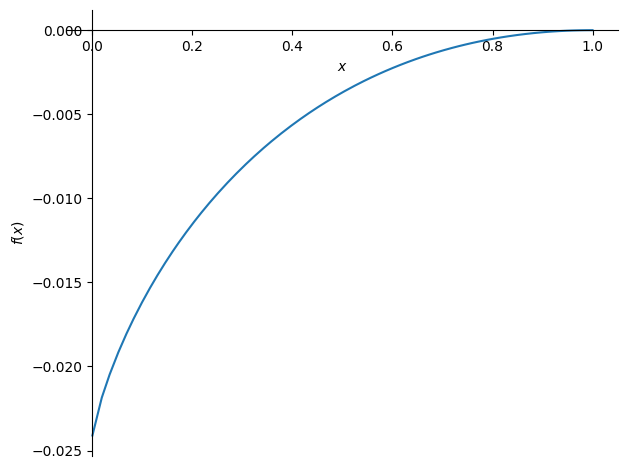

In [145]:
w_plot = w_sol1.subs(constants).subs({C4: 0, L: 1, Q: -1, E: 1, alpha: pi/9})
plot(w_plot, (x, 1e-6, 1));